<a href="https://colab.research.google.com/github/iscel15/Ciencia-de-datos/blob/main/Pytorch_%26_sklearn_for_Galaxy_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,VotingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import tree

from sklearn.neural_network import MLPClassifier

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn import metrics

import xgboost as xgb
#from skopt import BayesSearchCV
from yellowbrick.classifier.rocauc import roc_auc
#import cufflinks as cf
#cf.go_offline()
%matplotlib inline 


In [ ]:
df_galax = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/GalaxyZoo1_DR_table2.csv',error_bad_lines=False)
df_galax.head()

<ipython-input-2-18372f43efe4>:1: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df_galax = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/GalaxyZoo1_DR_table2.csv',error_bad_lines=False)


,OBJID,RA,DEC,NVOTE,P_EL,P_CW,P_ACW,P_EDGE,P_DK,P_MG,P_CS,P_EL_DEBIASED,P_CS_DEBIASED,SPIRAL,ELLIPTICAL,UNCERTAIN
0,587727178986356823,00:00:00.41,-10:22:25.7,59,0.610,0.034,0.000,0.153,0.153,0.051,0.186,0.610,0.186,0,0,1
1,587727227300741210,00:00:00.74,-09:13:20.2,18,0.611,0.000,0.167,0.222,0.000,0.000,0.389,0.203,0.797,1,0,0
2,587727225153257596,00:00:01.03,-10:56:48.0,68,0.735,0.029,0.000,0.147,0.074,0.015,0.176,0.432,0.428,0,0,1
3,587730774962536596,00:00:01.38,+15:30:35.3,52,0.885,0.019,0.000,0.058,0.019,0.019,0.077,0.885,0.077,0,1,0
4,587731186203885750,00:00:01.55,-00:05:33.3,59,0.712,0.000,0.000,0.220,0.068,0.000,0.220,0.640,0.290,0,0,1


In [ ]:
df_galax.columns

Index(['OBJID', 'RA', 'DEC', 'NVOTE', 'P_EL', 'P_CW', 'P_ACW', 'P_EDGE',
       'P_DK', 'P_MG', 'P_CS', 'P_EL_DEBIASED', 'P_CS_DEBIASED', 'SPIRAL',
       'ELLIPTICAL', 'UNCERTAIN'],
      dtype='object')

In [ ]:
print('Data Types:')
print(df_galax.dtypes)
print('')
print('')
print('Data Shape:')
print(df_galax.shape)

Data Types:
OBJID              int64
RA                object
DEC               object
NVOTE              int64
P_EL             float64
P_CW             float64
P_ACW            float64
P_EDGE           float64
P_DK             float64
P_MG             float64
P_CS             float64
P_EL_DEBIASED    float64
P_CS_DEBIASED    float64
SPIRAL             int64
ELLIPTICAL         int64
UNCERTAIN          int64
dtype: object


Data Shape:
(667944, 16)


The first column is a unique identifier which cannot be a feature for our model, and the second and third columns are the absolute positions of galaxies which do not correlate with our classes/targets, so we can remove them all

In [ ]:
data =df_galax.drop(['OBJID','RA','DEC'],axis=1)

In [ ]:
data.isnull().sum().sort_values(ascending=False)

NVOTE            0
P_EL             0
P_CW             0
P_ACW            0
P_EDGE           0
P_DK             0
P_MG             0
P_CS             0
P_EL_DEBIASED    0
P_CS_DEBIASED    0
SPIRAL           0
ELLIPTICAL       0
UNCERTAIN        0
dtype: int64

In [ ]:
data.isnull().sum().sort_values(ascending=False)

NVOTE            0
P_EL             0
P_CW             0
P_ACW            0
P_EDGE           0
P_DK             0
P_MG             0
P_CS             0
P_EL_DEBIASED    0
P_CS_DEBIASED    0
SPIRAL           0
ELLIPTICAL       0
UNCERTAIN        0
dtype: int64

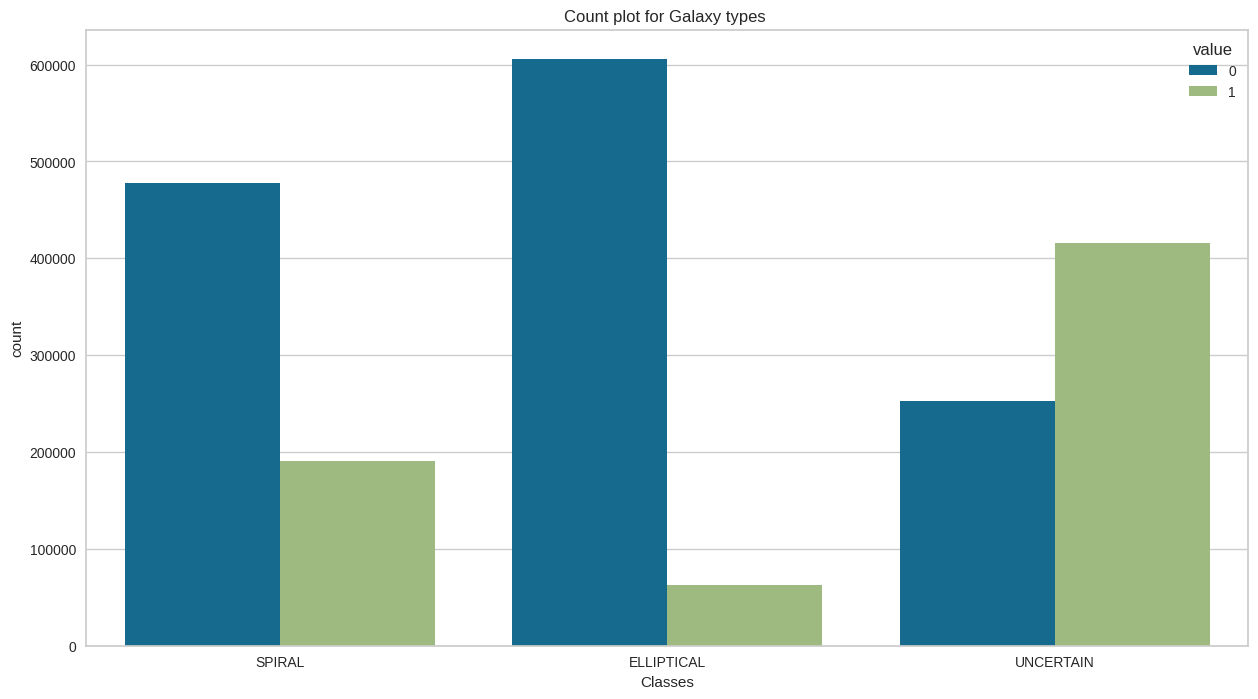

In [ ]:
plt.figure(figsize=(15,8))
plt.title('Count plot for Galaxy types ')
countplt = data[['SPIRAL','ELLIPTICAL','UNCERTAIN']]
sns.countplot(x="variable",hue='value', data=pd.melt(countplt))
plt.xlabel('Classes')
plt.show()

In [ ]:
x = data.drop(['SPIRAL','ELLIPTICAL','UNCERTAIN'],axis=1).values
y = data[['SPIRAL','ELLIPTICAL','UNCERTAIN']].values

In [ ]:
# Separamos los datos en dos: training data y testing data
# random state : "semilla", es útil para que el'pipeline' sea determinista
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.20,
                                                    random_state=42, stratify=y)

Feature scaling is a fundamental technique in data preprocessing for machine and deep learning models. It involves transforming the range of features to a standardized scale, typically between 0 and 1 or -1 and 1, to improve model performance. Feature scaling is necessary because features can have different units, scales, and distributions, which can affect model convergence and accuracy. By scaling features, we can ensure that all features contribute equally to the model's predictions, reducing the impact of features with larger values. Scaling can also help to improve the efficiency of some machine learning algorithms, such as gradient descent, by reducing the number of iterations needed for convergence. 



In [ ]:
 #References
 
from IPython.core.display import HTML
HTML("<a href='https://scikit-learn.org/stable/modules/preprocessing.html' target='_blank'>scikit-learn preprocessing documentation</a>")

In [ ]:
# Feature scaling
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

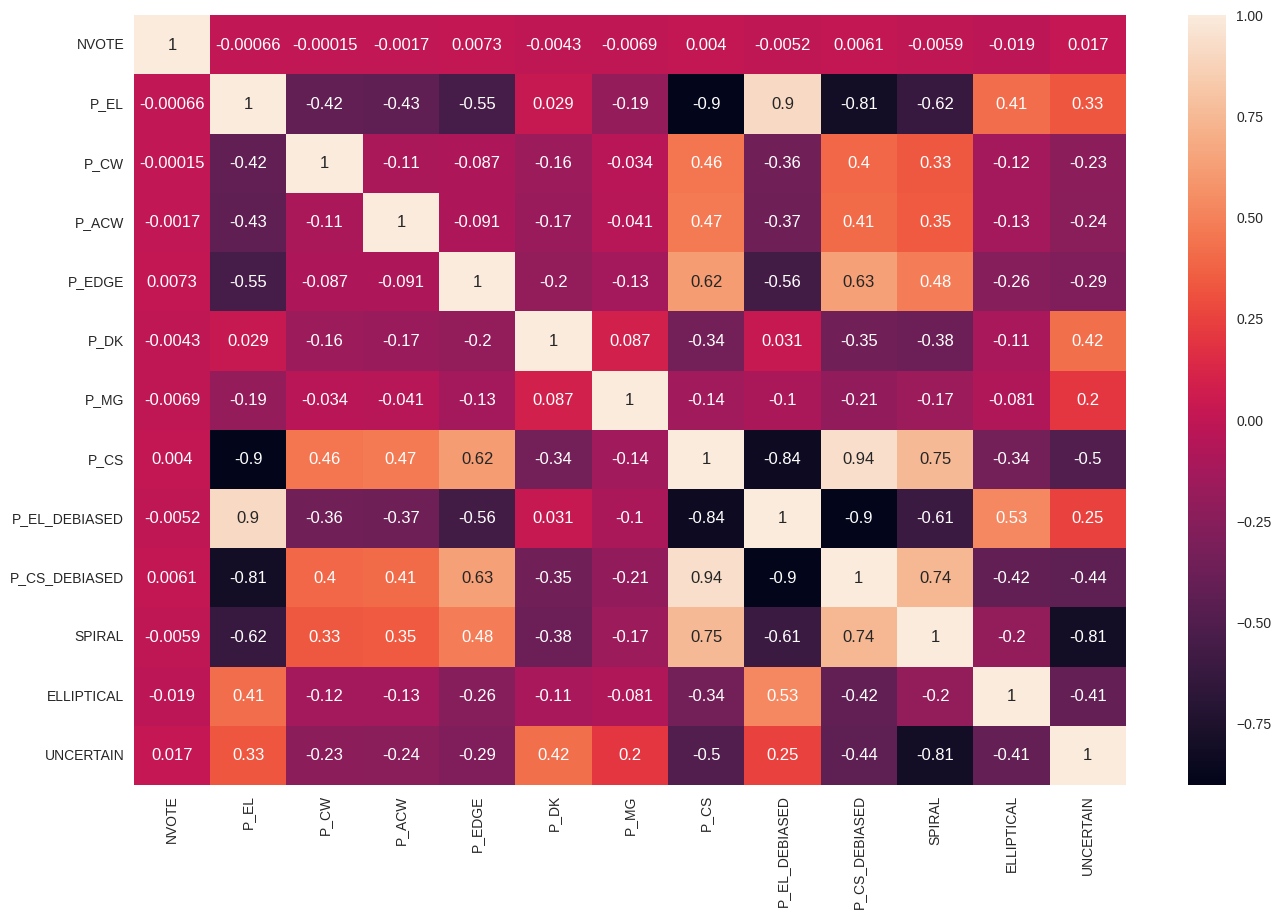

In [ ]:
corr_mat= data.corr(method='pearson')  
plt.figure(figsize=(16,10))
dataplot = sns.heatmap(corr_mat,annot=True)  
plt.show()

In [ ]:
#param = {'hidden_layer_sizes':[10,50,100,200,300],'activation':['relu','identity','logistic'],
         #'alpha':[0.0001,0.001,0.01],'momentum':[0.95,0.90,0.85,0.80],
         #'learning_rate_init':[0.001,0.01,0.1],'n_iter_no_change':[10,20,30,40,50],
         #'learning_rate':['constant','invscaling','adaptive']}
# 'Momentum'for gradient descent update. Should be between 0 and 1
# 'constant' is a constant learning rate given by 'learning_rate_int'.
# 'invscaling' gradually decreases the learning rate at each time step 't' using an inverse scaling exponent
# 'adaptive' keeps the learning rate constant to 'learning_rate_init' as long as training loss keeps decreasing
# or fall to increase validation socre by at least the tolerance the
# current learning rate is divided by

#mlp = MLPClassifier(max_iter=10000,early_stopping=True,random_state=0)
#mlp_bs = BayesSearchCV(mlp,param,n_iter=15,cv=5,n_jobs=-1,refit=True,random_state=0)
#mlp_bs.name = 'Multilayer Perceptron Neural Network'
#mlp_bs.fit(x_train, y_train)

In [ ]:
cl_xgb = xgb.XGBClassifier()
cl_xgb.name = 'Extreme Gradient Boosting (XGB)'

In [ ]:
acc = []
model = []
Classifiers_list = [cl_xgb]

# Pending:
#[cl_lr, cl_rf_opt, cl_kn_opt, cl_dt, cl_xgb, cl_gnb,cl_svm_pol,cl_svm_rbf,cl_svm_sig,cl_svm_lin,mlp_bs]

In [ ]:
cl_xgb.fit(x_train, y_train)
y_pred = cl_xgb.predict(x_test)

In [ ]:
metric = metrics.accuracy_score(y_test, y_pred)
acc.append(x)
model.append(cl_xgb.name)
print(str(cl_xgb.name) + " " + "Accuracy is: ", metric.round(4))

Extreme Gradient Boosting (XGB) Accuracy is:  0.8946


In [ ]:
#df_pred = pd.DataFrame[x_test,y_test,y_pred]
print(y_pred)
print(y_test)

[[0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 ...
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]]
[[1 0 0]
 [1 0 0]
 [0 0 1]
 ...
 [1 0 0]
 [1 0 0]
 [0 0 1]]


When using classification models in machine learning, there are three common metrics that we use to assess the quality of the model:

1. ## Precision: 
Percentage of correct positive predictions relative to total positive predictions.

2. ## Recall: 
Percentage of correct positive predictions relative to total actual positives.

3. ## F1 Score: 
A weighted harmonic mean of precision and recall. The closer to 1, the better the model.

F1 Score: 2 * (Precision * Recall) / (Precision + Recall)

Using these three metrics, we can understand how well a given classification model is able to predict the outcomes for some response variable.

In [ ]:
   print(metrics.classification_report(y_test, y_pred, target_names=['SPIRAL','ELLIPTICAL','UNCERTAIN']))
    #print(metrics.confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

      SPIRAL       0.87      0.89      0.88     38045
  ELLIPTICAL       0.86      0.82      0.84     12438
   UNCERTAIN       0.92      0.92      0.92     83106

   micro avg       0.90      0.90      0.90    133589
   macro avg       0.89      0.88      0.88    133589
weighted avg       0.90      0.90      0.90    133589
 samples avg       0.90      0.90      0.90    133589



/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
param = {'hidden_layer_sizes':[10,50,100,200,300],'activation':['relu','identity','logistic'],
         'alpha':[0.0001,0.001,0.01],'momentum':[0.95,0.90,0.85,0.80],
         'learning_rate_init':[0.001,0.01,0.1],'n_iter_no_change':[10,20,30,40,50],
         'learning_rate':['constant','invscaling','adaptive']}

mlp = MLPClassifier(hidden_layer_sizes = 10, max_iter=10000,early_stopping=True,random_state=0)
mlp.fit(x_train,y_train)
y_pred = mlp.predict(x_test)
print(metrics.classification_report(y_test, y_pred, target_names=['SPIRAL','ELLIPTICAL','UNCERTAIN']))

              precision    recall  f1-score   support

      SPIRAL       0.87      0.90      0.88     38045
  ELLIPTICAL       0.89      0.77      0.82     12438
   UNCERTAIN       0.92      0.92      0.92     83106

   micro avg       0.90      0.90      0.90    133589
   macro avg       0.89      0.86      0.87    133589
weighted avg       0.90      0.90      0.90    133589
 samples avg       0.90      0.90      0.90    133589



/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Using Pytorch

In [ ]:
import torch
torch.__version__

'2.0.0+cu118'

## 1.2 Turn data into tensors and create train and test splits

We've investigated the input and output shapes of our data, now let's prepare it for being used with PyTorch and for modelling.

Specifically, we'll need to:

Turn our data into tensors (right now our data is in NumPy arrays and PyTorch prefers to work with PyTorch tensors).
Split our data into training and test sets (we'll train a model on the training set to learn the patterns between X and y and then evaluate those learned patterns on the test dataset).

 ! [Imagen] (https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/01-machine-learning-a-game-of-two-parts.png)




In [ ]:
X = torch.from_numpy(np.asarray(x)).type(torch.float)
Y = torch.from_numpy(np.asarray(y)).type(torch.float)


In [ ]:
X, Y

(tensor([[5.9000e+01, 6.1000e-01, 3.4000e-02,  ..., 1.8600e-01, 6.1000e-01,
          1.8600e-01],
         [1.8000e+01, 6.1100e-01, 0.0000e+00,  ..., 3.8900e-01, 2.0300e-01,
          7.9700e-01],
         [6.8000e+01, 7.3500e-01, 2.9000e-02,  ..., 1.7600e-01, 4.3200e-01,
          4.2800e-01],
         ...,
         [2.8000e+01, 2.8600e-01, 0.0000e+00,  ..., 4.6400e-01, 9.9000e-02,
          6.0300e-01],
         [2.3000e+01, 3.9100e-01, 0.0000e+00,  ..., 4.3000e-02, 3.9000e-01,
          4.5000e-02],
         [5.4000e+01, 5.5600e-01, 0.0000e+00,  ..., 3.7000e-01, 1.5300e-01,
          7.2200e-01]]),
 tensor([[0., 0., 1.],
         [1., 0., 0.],
         [0., 0., 1.],
         ...,
         [0., 0., 1.],
         [0., 0., 1.],
         [1., 0., 0.]]))


Now our data is in tensor format, let's split it into training and test sets.

To do so, let's use the helpful function train_test_split() from Scikit-Learn.

We'll use test_size=0.2 (80% training, 20% testing) and because the split happens randomly across the data, let's use random_state=42 so the split is reproducible.

In [ ]:

# Split data into train and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, 
                                                    Y, 
                                                    test_size=0.2, # 20% test, 80% train
                                                    random_state=42) # make the random split reproducible

len(X_train), len(X_test), len(Y_train), len(Y_test)

(534355, 133589, 534355, 133589)

# 2. Building a model
We've got some data ready, now it's time to build a model.

We'll break it down into a few parts.

Setting up device agnostic code (so our model can run on CPU or GPU if it's available).
Constructing a model by subclassing nn.Module.
Defining a loss function and optimizer.
Creating a training loop (this'll be in the next section).
The good news is we've been through all of the above steps before in notebook 01.

Except now we'll be adjusting them so they work with a classification dataset.

Let's start by importing PyTorch and torch.nn as well as setting up device agnostic code.

In [ ]:
# Standard PyTorch imports
from torch import nn

# Make device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

We'll want a model capable of handling our X data as inputs and producing something in the shape of our y data as ouputs.

In other words, given X (features) we want our model to predict y (label).

This setup where you have features and labels is referred to as supervised learning. Because your data is telling your model what the outputs should be given a certain input.

To create such a model it'll need to handle the input and output shapes of X and y.

Remember how I said input and output shapes are important? Here we'll see why.

Let's create a model class that:

Subclasses nn.Module (almost all PyTorch models are subclasses of nn.Module).
Creates 2 nn.Linear layers in the constructor capable of handling the input and output shapes of X and y.
Defines a forward() method containing the forward pass computation of the model.
Instantiates the model class and sends it to the target device.

In [ ]:
# 1. Construct a model class that subclasses nn.Module
class CircleModelV0(nn.Module):
    def __init__(self):
        super().__init__()
        # 2. Create 2 nn.Linear layers capable of handling X and y input and output shapes
        self.layer_1 = nn.Linear(in_features=10, out_features=20) # takes in 10 features (X), produces 20 features
        self.layer_2 = nn.Linear(in_features=20, out_features=3) # takes in 20 features, produces 3 featureS (y)
    
    # 3. Define a forward method containing the forward pass computation
    def forward(self, X):
        # Return the output of layer_2, a single feature, the same shape as y
        return self.layer_2(self.layer_1(X)) # computation goes through layer_1 first then the output of layer_1 goes through layer_2

# 4. Create an instance of the model and send it to target device
model_0 = CircleModelV0().to(device)
model_0

CircleModelV0(
  (layer_1): Linear(in_features=10, out_features=20, bias=True)
  (layer_2): Linear(in_features=20, out_features=3, bias=True)
)

What's going on here?

We've seen a few of these steps before.

The only major change is what's happening between self.layer_1 and self.layer_2.

self.layer_1 takes 2 input features in_features=2 and produces 5 output features out_features=5.

This is known as having 5 hidden units or neurons.

This layer turns the input data from having 2 features to 5 features.

Why do this?

This allows the model to learn patterns from 5 numbers rather than just 2 numbers, potentially leading to better outputs.

I say potentially because sometimes it doesn't work.

The number of hidden units you can use in neural network layers is a hyperparameter (a value you can set yourself) and there's no set in stone value you have to use.

Generally more is better but there's also such a thing as too much. The amount you choose will depend on your model type and dataset you're working with.

Since our dataset is small and simple, we'll keep it small.

The only rule with hidden units is that the next layer, in our case, self.layer_2 has to take the same in_features as the previous layer out_features.

That's why self.layer_2 has in_features=5, it takes the out_features=5 from self.layer_1 and performs a linear computation on them, turning them into out_features=1 (the same shape as y).

In [ ]:
# Make predictions with the model
untrained_preds = model_0(X_test.to(device))
print(f"Length of predictions: {len(untrained_preds)}, Shape: {untrained_preds.shape}")
print(f"Length of test samples: {len(Y_test)}, Shape: {Y_test.shape}")
print(f"\nFirst 10 predictions:\n{untrained_preds[:10]}")
print(f"\nFirst 10 test labels:\n{Y_test[:10]}")

Length of predictions: 133589, Shape: torch.Size([133589, 3])
Length of test samples: 133589, Shape: torch.Size([133589, 3])

First 10 predictions:
tensor([[-9.4059, -5.5992,  5.3674],
        [-9.2321, -5.6455,  5.3573],
        [-8.0064, -4.7566,  4.5665],
        [-7.9602, -4.7709,  4.6284],
        [-5.9735, -3.5478,  3.3242],
        [-5.4018, -3.1997,  3.0022],
        [-9.0096, -5.3448,  5.1448],
        [-7.6470, -4.5429,  4.3140],
        [-7.4040, -4.4324,  4.2119],
        [-9.6352, -5.7488,  5.5231]], grad_fn=<SliceBackward0>)

First 10 test labels:
tensor([[0., 0., 1.],
        [1., 0., 0.],
        [0., 0., 1.],
        [0., 0., 1.],
        [1., 0., 0.],
        [0., 0., 1.],
        [0., 0., 1.],
        [0., 0., 1.],
        [0., 0., 1.],
        [0., 0., 1.]])


The predictions don't look like they're in the same form or shape as the test labels.

We've got a couple steps we can do to fix this.

### PyTorch has two binary cross entropy implementations:

          torch.nn.BCELoss() 
- Creates a loss function that measures the binary cross entropy between the target (label) and input (features).

         torch.nn.BCEWithLogitsLoss() 
- This is the same as above except it has a sigmoid layer (nn.Sigmoid) built-in (we'll see what this means soon).
Which one should you use?

 The documentation for torch.nn.BCEWithLogitsLoss() states that it's more numerically stable than using torch.nn.BCELoss() after a nn.Sigmoid layer.

So generally, implementation 2 is a better option. However for advanced usage, you may want to separate the combination of nn.Sigmoid and torch.nn.BCELoss() but that is beyond the scope of this notebook.



 ## Loss function & Optimizer.

For the optimizer we'll use torch.optim.SGD() to optimize the model parameters with learning rate 0.1.

In [ ]:
# Create a loss function
# loss_fn = nn.BCELoss() # BCELoss = no sigmoid built-in
loss_fn = nn.BCEWithLogitsLoss() # BCEWithLogitsLoss = sigmoid built-in

# Create an optimizer
optimizer = torch.optim.SGD(params=model_0.parameters(), 
                            lr=0.1)

### Evaluation metric.

An evaluation metric can be used to offer another perspective on how the model is going.

If a loss function measures how wrong your model is, I like to think of evaluation metrics as measuring how right it is.


There are several evaluation metrics that can be used for classification problems but let's start out with accuracy.

- Accuracy can be measured by dividing the total number of correct predictions over the total number of predictions.





In [ ]:
# Calculate accuracy (a classification metric)
def accuracy_fn(Y_test, Y_pred):
    correct = torch.eq(Y_test, Y_pred).sum().item() # torch.eq() calculates where two tensors are equal
    acc = (correct / len(Y_pred)) * 100 
    return acc


# 3. Train model
* Forward pass - The model goes through all of the training data once, performing its forward() function calculations (model(x_train)).

* Calculate the loss - The model's outputs (predictions) are compared to the ground truth and evaluated to see how wrong they are (loss = loss_fn(y_pred, y_train).

* Zero gradients - The optimizers gradients are set to zero (they are accumulated by default) so they can be recalculated for the specific training step (optimizer.zero_grad()).

* Perform backpropagation on the loss - Computes the gradient of the loss with respect for every model parameter to be updated (each parameter with requires_grad=True). This is known as backpropagation, hence "backwards" (loss.backward()).

* Step the optimizer (gradient descent) - Update the parameters with requires_grad=True with respect to the loss gradients in order to improve them (optimizer.step()).


## 3.1 Going from raw model outputs to predicted labels 

(logits -> prediction probabilities -> prediction labels)

Before training loop steps, let's see what comes out of our model during the forward pass (the forward pass is defined by the forward() method).

To do so, let's pass the model some data.

In [ ]:
# View the frist 5 outputs of the forward pass on the test data
y_logits = model_0(X_test.to(device))[:5]
y_logits

tensor([[-9.4059, -5.5992,  5.3674],
        [-9.2321, -5.6455,  5.3573],
        [-8.0064, -4.7566,  4.5665],
        [-7.9602, -4.7709,  4.6284],
        [-5.9735, -3.5478,  3.3242]], grad_fn=<SliceBackward0>)

Since our model hasn't been trained, these outputs are basically random.


They're the output of our forward() method.

Which implements two layers of nn.Linear() which internally calls a linear equation.

The raw outputs (unmodified) of this equation (
y
) and in turn, the raw outputs of our model are often referred to as logits.

That's what our model is outputing above when it takes in the input data (
x
 in the equation or X_test in the code), logits.

To get our model's raw outputs (logits) into such a form, we can use the Sigmoid activation function.


In [ ]:
# Use sigmoid on model logits
y_pred_probs = torch.sigmoid(y_logits)
y_pred_probs

tensor([[8.2227e-05, 3.6870e-03, 9.9536e-01],
        [9.7836e-05, 3.5209e-03, 9.9531e-01],
        [3.3321e-04, 8.5216e-03, 9.8971e-01],
        [3.4897e-04, 8.4015e-03, 9.9032e-01],
        [2.5388e-03, 2.7984e-02, 9.6525e-01]], grad_fn=<SigmoidBackward0>)


It  the outputs now are in the form of prediction probabilities.

In our case, since we're dealing with binary classification, our ideal outputs are 0 or 1.

So these values can be viewed as a decision boundary.

The closer to 0, the more the model thinks the sample belongs to class 0, the closer to 1, the more the model thinks the sample belongs to class 1.

More specificially:

* If y_pred_probs >= 0.5, y=1 (class 1)
* If y_pred_probs < 0.5, y=0 (class 0)

To turn our prediction probabilities in prediction labels, we can round the outputs of the sigmoid activation function.

In [ ]:
# Find the predicted labels (round the prediction probabilities)
y_preds = torch.round(y_pred_probs)

# In full
y_pred_labels = torch.round(torch.sigmoid(model_0(X_test.to(device))[:5]))

# Check for equality
print(torch.eq(y_preds.squeeze(), y_pred_labels.squeeze()))

# Get rid of extra dimension
y_preds.squeeze()

tensor([[True, True, True],
        [True, True, True],
        [True, True, True],
        [True, True, True],
        [True, True, True]])


tensor([[0., 0., 1.],
        [0., 0., 1.],
        [0., 0., 1.],
        [0., 0., 1.],
        [0., 0., 1.]], grad_fn=<SqueezeBackward0>)

In [ ]:
Y_test[:]

tensor([[0., 0., 1.],
        [1., 0., 0.],
        [0., 0., 1.],
        ...,
        [1., 0., 0.],
        [0., 0., 1.],
        [0., 0., 1.]])



Note: The use of the sigmoid activation function is often only for binary classification logits. For multi-class classification, we'll be looking at using the softmax activation function.

And the use of the sigmoid activation function is not required when passing our model's raw outputs to the nn.BCEWithLogitsLoss (the "logits" in logits loss is because it works on the model's raw logits output), this is because it has a sigmoid function built-in.


## 3.2 Building a training and testing loop

Alright, we've discussed how to take our raw model outputs and convert them to prediction labels, now let's build a training loop.

Let's start by training for 100 epochs and outputing the model's progress every 10 epochs.

In [ ]:
 Y_train


tensor([[0., 0., 1.],
        [0., 0., 1.],
        [0., 0., 1.],
        ...,
        [0., 0., 1.],
        [0., 0., 1.],
        [0., 1., 0.]])

In [ ]:
torch.manual_seed(42)

# Set the number of epochs
epochs = 100


# Build training and evaluation loop
for epoch in range(epochs):
    ### Training
    model_0.train()

    # 1. Forward pass (model outputs raw logits)
    y_logits = model_0(X_train).squeeze() # squeeze to remove extra `1` dimensions, this won't work unless model and data are on same device 
    y_pred = torch.round(torch.sigmoid(y_logits)) # turn logits -> pred probs -> pred labls
  
    # 2. Calculate loss/accuracy
    # loss = loss_fn(torch.sigmoid(y_logits), # Using nn.BCELoss you need torch.sigmoid()
    #                y_train) 
    loss = loss_fn(y_logits, # Using nn.BCEWithLogitsLoss works with raw logits
                   Y_train) 
    acc = accuracy_fn(Y_test=Y_train, 
                      Y_pred=y_pred) 

    # 3. Optimizer zero grad
    optimizer.zero_grad()

    # 4. Loss backwards
    loss.backward()

    # 5. Optimizer step
    optimizer.step()

    ### Testing
    model_0.eval()
    with torch.inference_mode():
        # 1. Forward pass
        test_logits = model_0(X_test).squeeze() 
        test_pred = torch.round(torch.sigmoid(test_logits))
        # 2. Caculate loss/accuracy
        test_loss = loss_fn(test_logits,
                            Y_test)
        test_acc = accuracy_fn(Y_test=Y_test,
                               Y_pred=test_pred)

    # Print out what's happening every 10 epochs
    if epoch % 10 == 0:
        print(f"Epoch: {epoch} | Loss: {loss:.5f}, Accuracy: {acc:.2f}% | Test loss: {test_loss:.5f}, Test acc: {test_acc:.2f}%")

Epoch: 0 | Loss: 4.80764, Accuracy: 75.56% | Test loss: 2.49624, Test acc: 224.30%
Epoch: 10 | Loss: 0.53275, Accuracy: 224.45% | Test loss: 0.53257, Test acc: 224.31%
Epoch: 20 | Loss: 0.52654, Accuracy: 224.45% | Test loss: 0.52679, Test acc: 224.31%
Epoch: 30 | Loss: 0.52165, Accuracy: 224.45% | Test loss: 0.52200, Test acc: 224.31%
Epoch: 40 | Loss: 0.52537, Accuracy: 224.45% | Test loss: 0.52796, Test acc: 224.31%
Epoch: 50 | Loss: 0.52182, Accuracy: 224.46% | Test loss: 0.52028, Test acc: 224.30%
Epoch: 60 | Loss: 0.51744, Accuracy: 224.53% | Test loss: 0.51860, Test acc: 224.30%
Epoch: 70 | Loss: 0.52194, Accuracy: 225.87% | Test loss: 0.52155, Test acc: 224.30%
Epoch: 80 | Loss: 0.51649, Accuracy: 227.04% | Test loss: 0.51816, Test acc: 224.30%
Epoch: 90 | Loss: 0.51697, Accuracy: 231.70% | Test loss: 0.51793, Test acc: 224.30%
